# Name and Project
RANDY NGUYEN

STAT4280 Final Project

Topic: GARCH models

# GARCH model(s) in Time Series Analysis



**Overview**



1.   Background
2.   History
3.   Basics of GARCH models
4.   GARCH modeling using stock data




# Background

* A GARCH model is an extension of an ARCH model that incorporates a moving average component and an auto-regressive component

* The assumption of a constant conditional variance will be violated in many time series problems. Therefore, models such as the autoregressive conditionally heteroscedastic or ARCH model, introduced by Engle were developed to model changes in volatility.


* The generalized autoregressive conditional heteroskedasticity (GARCH) process is a statistical model to estimating the volatility of financial markets and economic forecasting.


* This model is used by financial institutions to calculate the return volatility of stocks, bonds, and other investments


* Estimates and results can be used to determine pricing, and to determine which assets will potentially provide the best returns.

* Forecasting is done for marketing, hedge funds, risk management, and portfolio optimization




# History

* Dr. Tim Bollerslev developed GARCH in 1986 to address the problem of forecasting volatility in asset prices.


* Modeled after the ARCH model built by economist Robert F. Engle in 1982.

* Fun fact Robert Engle recevied the Nobel Peace Price in 2003 for his creation of ARCH model framework.

* Since the development of GARCH, many variations of GARCH models emerged.
    * Nonlinear (NGARCH)
    * Integrate (IGARCH)
    * Multivariate (MGARCH)
    * Univariate (UGARCH)














# Basics of GARCH modeling

For simplicity,  lets start with the GARCH(1,1) process


The GARCH(1,1) is the most widely used GARCH processes and it fits many data.

\\
$GARCH(1,1): σ^2_t =ω+ α_1 X^2_{t-1} + ... + α_1 X^2_{t-1} + β_1 σ^2_{t-1} + ... + β_1 σ^2_{t-1}$


* conditional variance ($α$) at time $t$ depends both on the past values of the shocks captured by the lagged squared error term ($σ^2_{t-1}$) and past values of ($X^2_{t-1}$)

\\
The GARCH model can be generalized as $GARCH(p,q)$ model in which the $p$ are lagged terms and $q$ terms of lagged conditional variances.

\\
$GARCH(p,q): σ^2_t =ω+ α_1 X^2_{t-1} + ... + α_p X^2_{t-p} + β_1 σ^2_{t-1} + ... + β_q σ^2_{t-q}$


\\



## Important Notes


1.   Coefficients: $α_1, α_p > 0$ to ensure that conditional variance is positive
2.   θ is the GARCH coefficient

3.   For stationarity, $α_p + α_1<1.$ if $> 1$ and intergrated GARCH process has occured

4. To emphasize the lag used, the model denoted by GARCH(p,q)

5. For the GARCH(1,1) model, only 3 parameters are estimated: $α_0, α_1, and α_p$

6. $GARCH(1,1)$  model is equivalent to an $ARCH(2)$ model

7. $GARCH(p,q)$ model equivalent to an $ARCH(p+q)$ model





## Packages used


1.   'xts', uniform handling of R's time-based data classes
2.   'astsa', carries data sets and scripts to accompany time series analysis
3. 'fGarch', collection of functions to analyze financial time series models



In [ ]:
install.packages('xts')
install.packages('astsa')
install.packages('fGarch')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gss’, ‘stabledist’, ‘timeDate’, ‘timeSeries’, ‘fBasics’, ‘fastICA’




In [ ]:
library(xts)
library(astsa)
library(fGarch)
library(rugarch)

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




## Example


Here is an example of fitting an AR(1)-GARCH(1,1) model to a time series
using daily DJIA returns

DJIA, also known as Dow Jones Industrial Average, is an index of 30 prominent stocks.

ACF,-0.1,-0.06,0.05,-0.02,-0.06,0.01,-0.02,0.02,-0.01,0.04,⋯,0.03,0.00,0.00,0.01,-0.03,0.02,0.02,-0.07,0.02,0.02
PACF,-0.1,-0.07,0.04,-0.02,-0.06,0.00,-0.02,0.03,-0.01,0.04,⋯,0.01,0.01,0.02,0.01,-0.03,0.01,0.02,-0.05,0.01,0.02


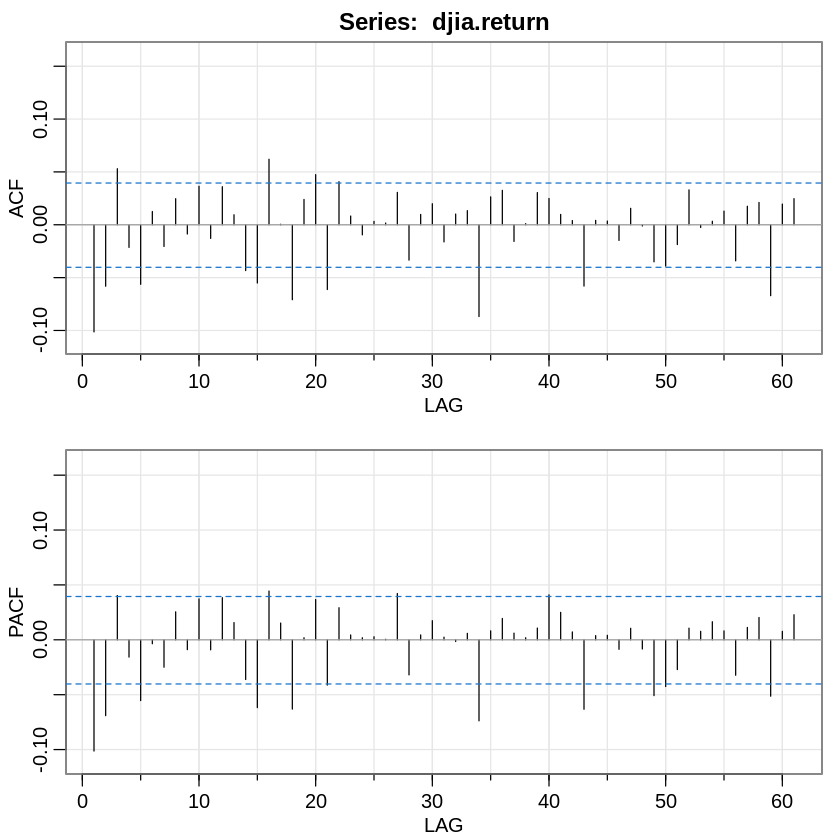

In [ ]:
djia.return <- diff(log(djia$Close))[-1]
acf2(djia.return) # shows some autocorrelation

On both ACF and PACF plots, there is a consistent trend between the horizontal lines after the 1 significant lag at the beginning.

ACF,0.2,0.41,0.19,0.31,0.34,0.31,0.32,0.22,0.32,0.24,⋯,0.08,0.06,0.09,0.06,0.12,0.09,0.06,0.08,0.04,0.08
PACF,0.2,0.39,0.08,0.15,0.25,0.13,0.11,0.01,0.11,0.05,⋯,0.04,0.02,-0.02,-0.09,0.08,0.06,0.00,0.01,-0.02,0.00


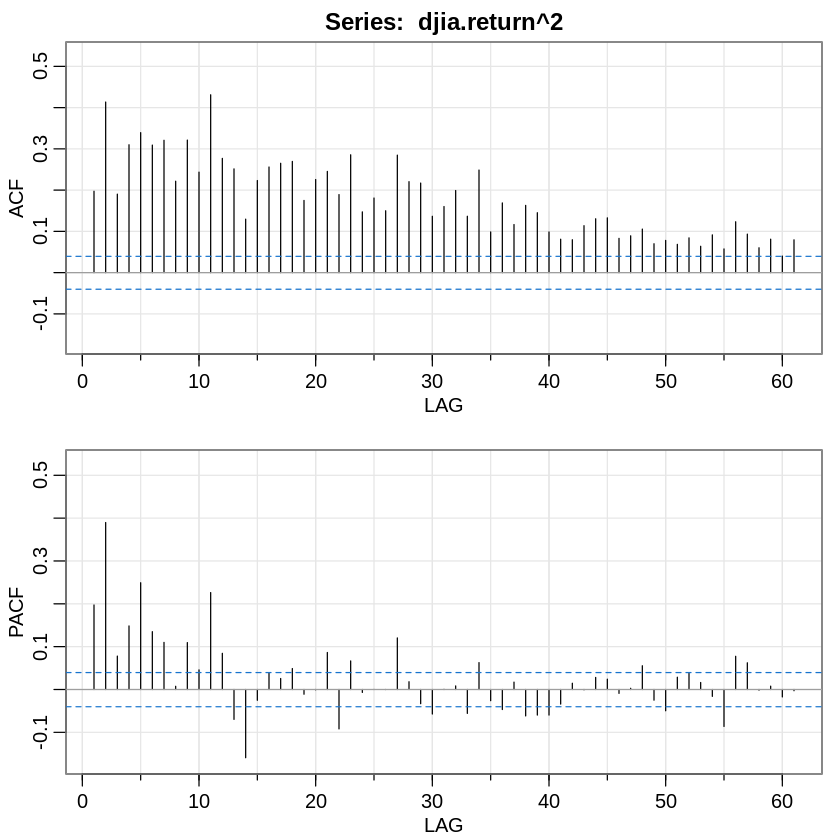

In [ ]:
acf2(djia.return^2) # shows some autocorrelation

The ACF plot above shows vertical lines of spikes for each lag. Since each spike is above the dashed line, it is statistically significant. The PACF, on the other hand, shows significant spikes at the beginning, but then declines as the lag increases.

In [ ]:
summary(djia.garch <- garchFit(~arma(1,0)+garch(1,1), data=djia.return,
cond.dist='std'))


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(1, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                1 0
 Max ARMA Order:            1
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          std
 h.start:                   2
 llh.start:                 1
 Length of Series:          2517
 Recursion Init:            mci
 Series Scale:              0.01210097

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V      params includes
    mu     -0.15336279   0.1533628  0.01533395     TRUE
    ar1    -0.99999999   1.0000000 -0.10129752     TRUE
    omega   0.00000100 100.0000000  0.10000000     TRUE
    alpha1  0.00000001   1.0000000  0.10000000     TRUE
    gamma1 -0.99999999   1.0000000 

Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”



Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 0) + garch(1, 1), data = djia.return, 
    cond.dist = "std") 

Mean and Variance Equation:
 data ~ arma(1, 0) + garch(1, 1)
<environment: 0x55ad13a39d58>
 [data = djia.return]

Conditional Distribution:
 std 

Coefficient(s):
         mu          ar1        omega       alpha1        beta1        shape  
 8.5853e-04  -5.5315e-02   1.6102e-06   1.2444e-01   8.7001e-01   5.9788e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      8.585e-04   1.470e-04    5.842 5.16e-09 ***
ar1    -5.531e-02   2.023e-02   -2.735 0.006239 ** 
omega   1.610e-06   4.459e-07    3.611 0.000305 ***
alpha1  1.244e-01   1.660e-02    7.497 6.55e-14 ***
beta1   8.700e-01   1.526e-02   57.022  < 2e-16 ***
shape   5.979e+00   7.917e-01    7.552 4.31e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 8249.619    normalized:  3.27756 

Description:
 Sun D

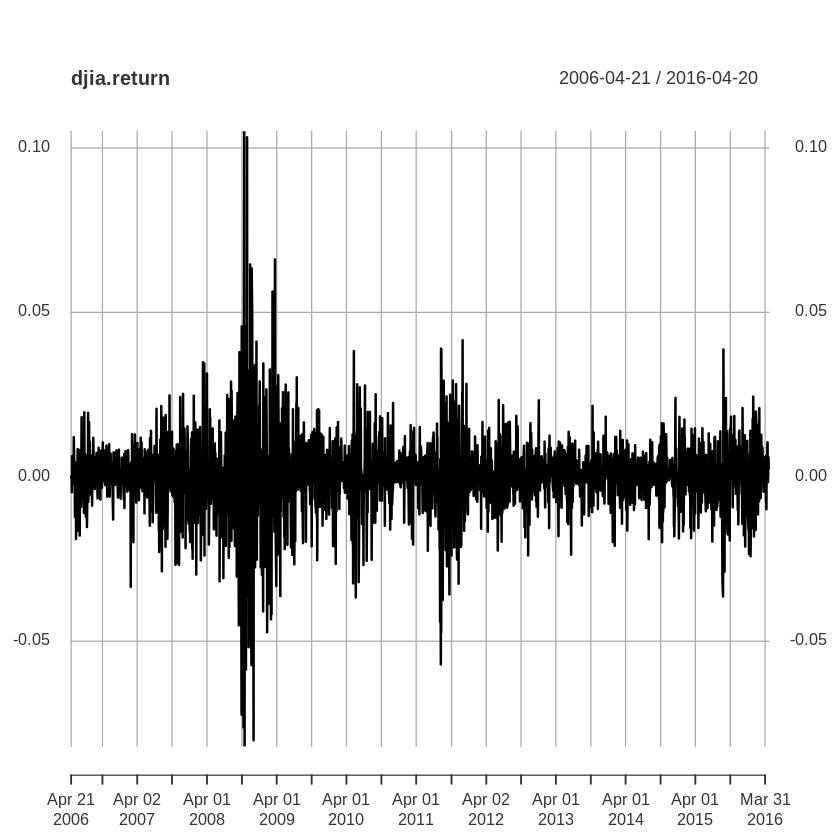

In [ ]:
plot(djia.return)

As you can see, the time series above has a zero mean and has very high volatility in 2008. This could be caused by the economic recession.

```
plot(djia.garch)
```
**This line of code didn't work on google colab because it has a interactive menu. Therefore, here is the time series plot with 2 conditional standard deviations**

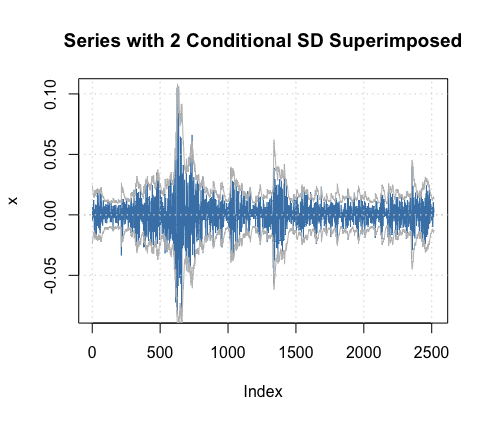


The following chart shows the returns as a time series with 2 conditional Standard Deviation lines. As you can see from the graph, the conditional SD lines are ahead of the DJIA volatility forecast. Which is a positive sign.

# Summary of GARCH models


1.   Estimate a good-fit autoregressive model
2.   Compute autocorrelations of error term
3.   Test for significance



# Volatility Clustering


*   Volatility clustering is the occurrence of periods of relative calm followed by periods of high volatility.





## Packages used


1.   "rugarch", for univariate GARCH models
2.   "rmgarch", for multivariate GARCH models
3.   "quantmod", package carries standard financial data

In [ ]:
install.packages('rugarch')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('PerformanceAnalytics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’




In [ ]:
library(quantmod)
library(rugarch)
library(PerformanceAnalytics)


Attaching package: ‘PerformanceAnalytics’


The following objects are masked from ‘package:timeDate’:

    kurtosis, skewness


The following object is masked from ‘package:graphics’:

    legend




##Real data use
For this section, I will use the GARCH model on daily stock returns

### Example #1

To examine variability, we will use the object "GOOG" that contains the daily observations ("Open", "High", "Low", "Close", "Volume", and "Adjusted" share price).

           GOOG.Open GOOG.High GOOG.Low GOOG.Close GOOG.Volume GOOG.Adjusted
2014-03-27  566.4451  566.4451 551.4064   556.9312       13087      556.9312
2014-03-28  559.7136  564.8794 557.1406   558.4570       41115      558.4570
2014-03-31  565.3381  565.4478 555.4054   555.4453       10801      555.4453
2014-04-01  557.1805  566.8939 557.1805   565.6074        7953      565.6074
2014-04-02  579.1702  603.1743 560.6510   565.4478      147099      565.4478
2014-04-03  568.2900  585.6723 562.5857   568.1804     5101495      568.1804

An ‘xts’ object on 2014-03-27/2021-12-10 containing:
  Data: num [1:1943, 1:6] 566 560 565 557 579 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "GOOG.Open" "GOOG.High" "GOOG.Low" "GOOG.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2021-12-12 06:48:00"


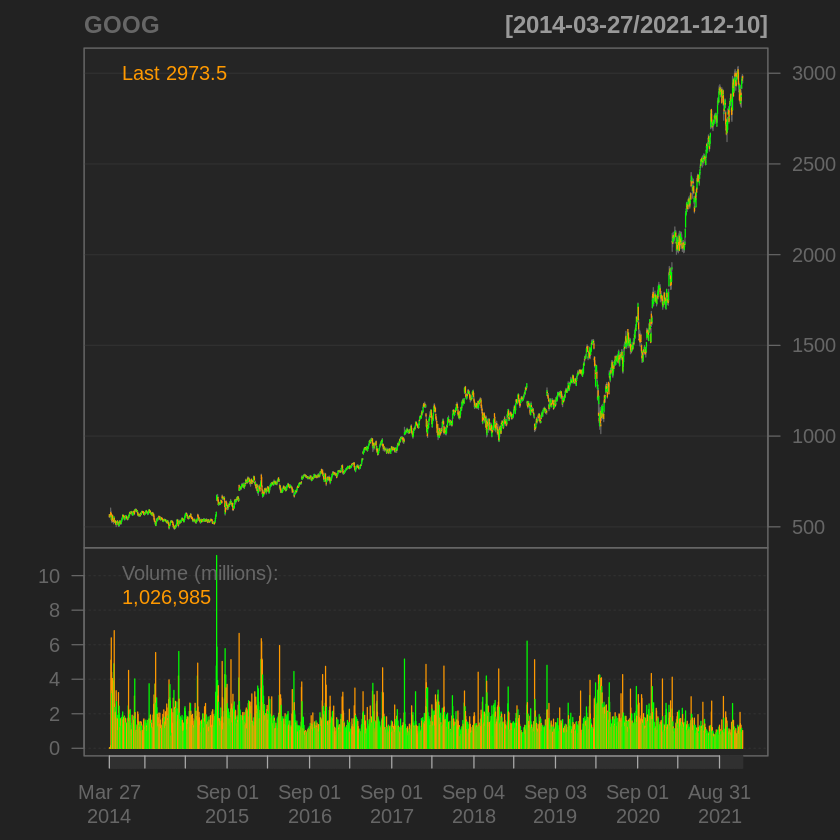

In [ ]:
df <- getSymbols("GOOG", from="2011-01-01",to="2021-12-12")
head(GOOG)
str(GOOG)
chartSeries(GOOG)

The time series plot displays the share price of Google from 03/27/2014 to 12/10/2021. The plots appear to show an upward trend with a slight curve. The bottom plot shows the volume of shares bought.

**NOTE**
When estimating volatility, we're dealing with returns not share prices.

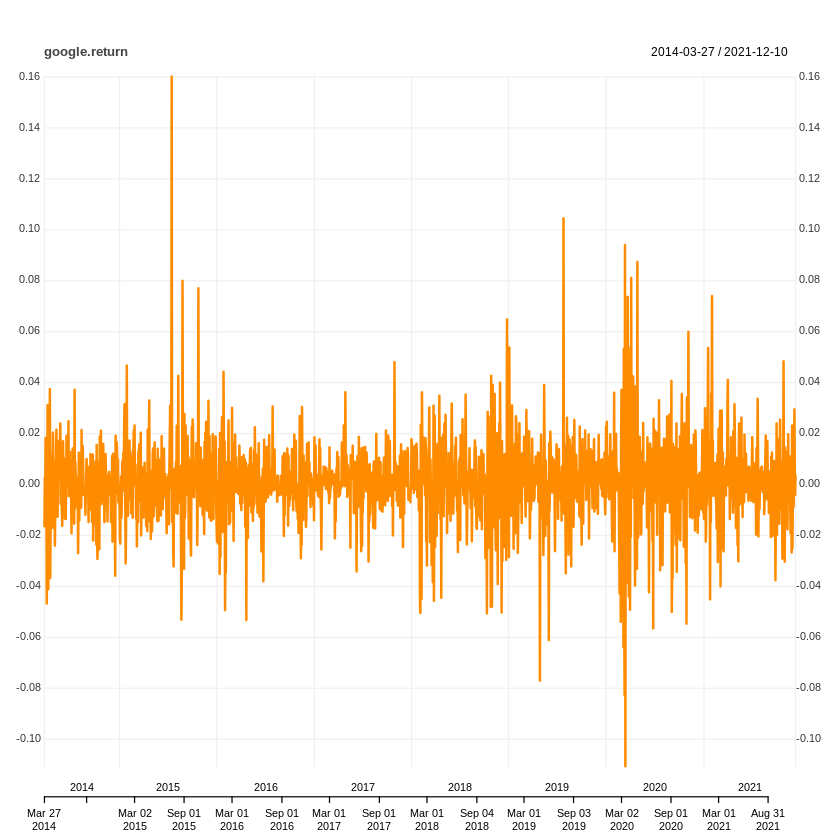

In [ ]:
google.return <- dailyReturn(GOOG)
chart_Series(google.return)

Taking a look at this time series of returns, it shows a zero mean and some spikes of high volatility. There was one spike in 2015 and one in 2019.

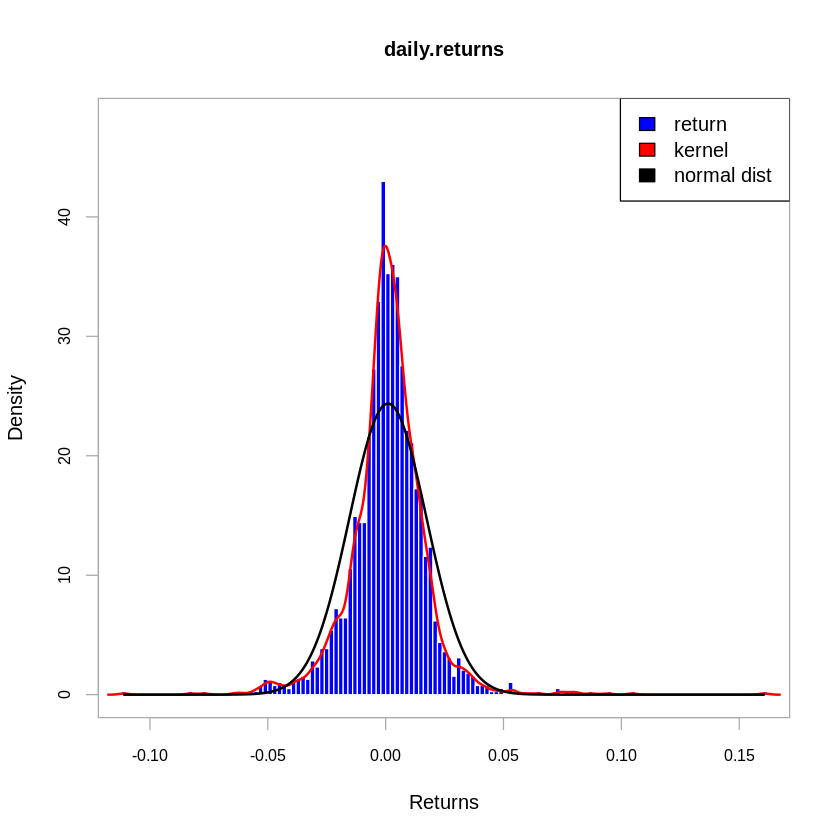

In [ ]:
chart.Histogram(google.return,method = c('add.density','add.normal'),colorset = c('blue','red','black'))
legend('topright',legend = c('return','kernel','normal dist'),fill = c('blue','red','black'))

The histogram identifies if the distribution is normal and can be used for the conditional error term.


The histogram of returns appears to be slightly skewed, so the normal distribution of returns is not useful.

In [ ]:
#Model specifications GARCH(1,1)
model.spec <- ugarchspec(mean.model = list(armaOrder=c(0,0)),variance.model = list(model = "sGARCH",garchOrder=c(1,1)),distribution.model = 'norm')
#model fitting
model.fit <- ugarchfit(data = google.return,spec = model.spec,out.sample = 20)
model.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001080    0.000309   3.4944 0.000475
omega   0.000026    0.000006   4.3874 0.000011
alpha1  0.161302    0.028539   5.6521 0.000000
beta1   0.748292    0.042832  17.4704 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001080    0.000339   3.1907 0.001419
omega   0.000026    0.000016   1.5821 0.113618
alpha1  0.161302    0.081974   1.9677 0.049102
beta1   0.748292    0.117373   6.3753 0.000000

LogLikelihood : 5346.042 

Information Criteria
------------------------------------
                    
Akaike       -5.5559
Bayes        -5.5444
Shibata      -5.5560
Hannan-Quinn -5.5517

Weig

### Example #2
In this example, we will look at the IBM stock

           IBM.Open IBM.High IBM.Low IBM.Close IBM.Volume IBM.Adjusted
2011-01-03   147.21   148.20  147.14    147.48    4604911     101.3058
2011-01-04   147.56   148.22  146.64    147.64    5060088     101.4158
2011-01-05   147.34   147.48  146.73    147.05    4659195     101.0105
2011-01-06   147.13   148.79  146.82    148.66    5032270     102.1164
2011-01-07   148.79   148.86  146.94    147.93    4136379     101.6150
2011-01-10   147.58   148.06  147.23    147.64    3633350     101.4158

An ‘xts’ object on 2011-01-03/2021-12-10 containing:
  Data: num [1:2755, 1:6] 147 148 147 147 149 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "IBM.Open" "IBM.High" "IBM.Low" "IBM.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2021-12-12 07:59:21"


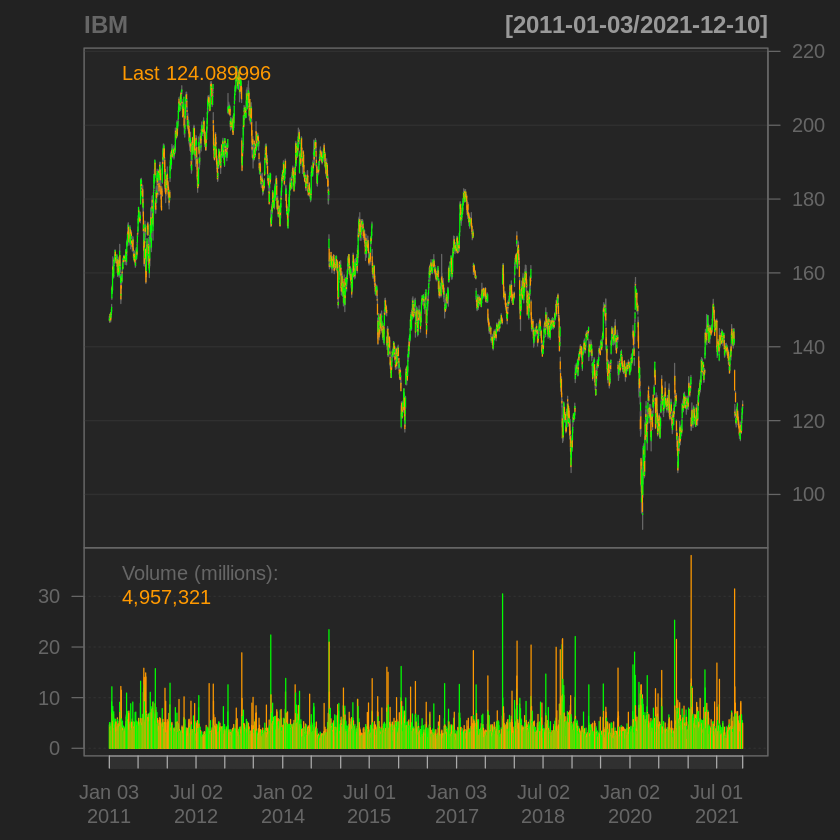

In [ ]:
df <- getSymbols("IBM", from="2011-01-01",to="2021-12-12")
head(IBM)
str(IBM)
chartSeries(IBM)

The time series plot reveals a steadily decreasing trend, which indicates that the share price decreased every year.

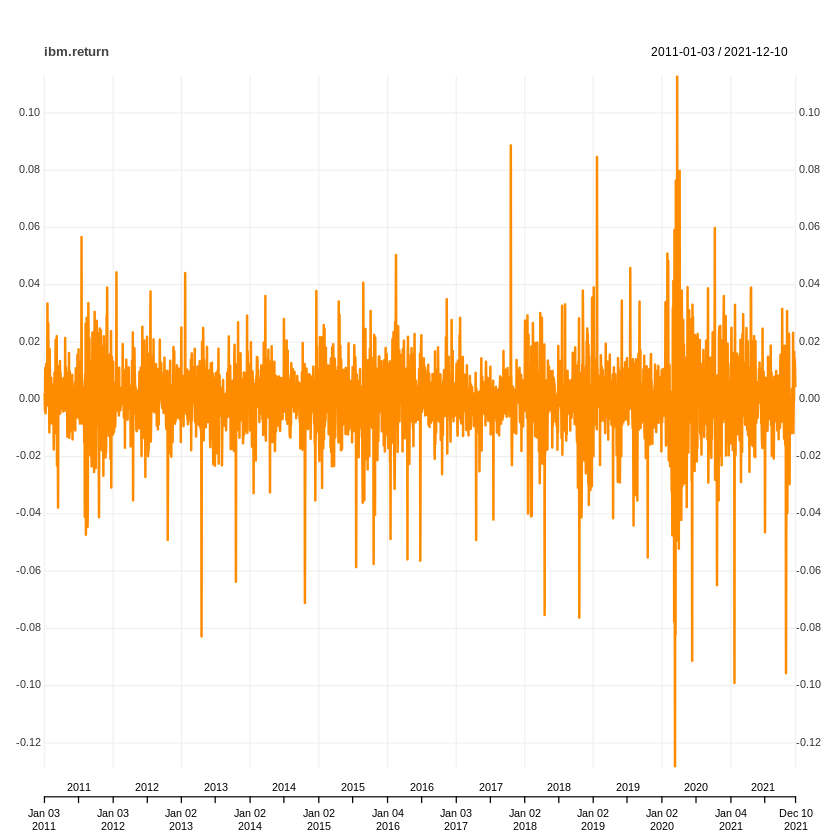

In [ ]:
ibm.return <- dailyReturn(IBM)
chart_Series(ibm.return)

The time series plot has a zero mean, meaning most of the fluctuations are close to zero. One sign of high volatility is 2020, this could be the time when Covid-19 happened and companies suffered losses.

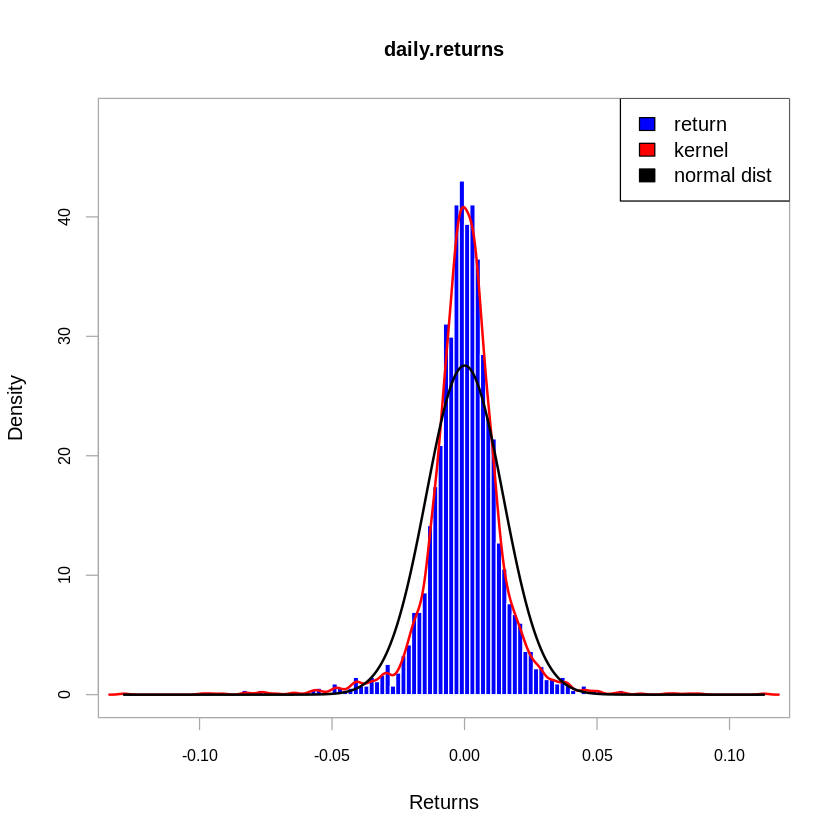

In [ ]:
chart.Histogram(ibm.return,method = c('add.density','add.normal'),colorset = c('blue','red','black'))
legend('topright',legend = c('return','kernel','normal dist'),fill = c('blue','red','black'))

In [ ]:
#Model specifications GARCH(1,1)
model.spec <- ugarchspec(mean.model = list(armaOrder=c(0,0)),variance.model = list(model = "sGARCH",garchOrder=c(1,1)),distribution.model = 'norm')
#model fitting
model.fit <- ugarchfit(data = ibm.return,spec = model.spec,out.sample = 20)
model.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000099    0.000239   0.4157  0.67763
omega   0.000020    0.000004   5.5544  0.00000
alpha1  0.105498    0.017917   5.8880  0.00000
beta1   0.797061    0.030785  25.8915  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000099    0.000256  0.38793 0.698066
omega   0.000020    0.000007  2.95201 0.003157
alpha1  0.105498    0.036822  2.86505 0.004169
beta1   0.797061    0.055216 14.43531 0.000000

LogLikelihood : 7935.808 

Information Criteria
------------------------------------
                    
Akaike       -5.8002
Bayes        -5.7916
Shibata      -5.8002
Hannan-Quinn -5.7971

Weig

# REFERENCES


*   Kenton, Will. “GARCH Process.” Investopedia, 25 Oct. 2020, www.investopedia.com/terms/g/generalalizedautogregressiveconditionalheteroskedasticity.asp.

\\

*   Shumway, Robert H., and David S. Stoffer. Time Series Analysis and Its Applications. 4th ed., Springer, Cham, 2017.

\\

*   Tsafack, Idriss. “GARCH Models with R Programming : A Practical Example with TESLA Stock.” Idrisstsafack, 25 Jan. 2021, www.idrisstsafack.com/post/garch-models-with-r-programming-a-practical-example-with-tesla-stock.

